In [1]:
pkl = '/data/neuralcoding/Behavior/Data/M258173/output/170105150329-task=DoC_MNIST_stage=0v1_probes_n=3_mouse=M258173.pkl'

In [2]:
import pickle
with open(pkl,'rb') as f:
    data = pickle.load(f)

In [3]:
trials = data['triallog']

In [4]:
def get_trial_type(tr):
    """
    this function takes in a trial packet from a detection of change task and returns a string with the trial type
    """
    if tr['change_time'] is None:
        if (len(tr['lick_times'])>0) and (tr['change_time'] is None):
            # licks & no change -> aborted
            return 'aborted'
        else:
            return 'other'
    else:
        if tr['auto_rewarded']==True:
            return 'autorewarded'
        elif tr['rewarded']==True:
            return 'go'
        else:
            return 'catch'
    
def get_aligned_licks(tr):
    """
    this function takes in a trial packet from a detection of change task and returns a list of lick times
    aligned to the change time
    """
    if tr['change_time'] is None:
        return []
    else:
        return [lick - tr['change_time'] for lick in tr['lick_times']]

def licked_in_response_window(tr,window=(0.15,1.0)):
    """
    this function takes in a trial packet from a detection of change task and returns a boolean
    indicating whether the mouse licked during the response window
    """
    licks = get_aligned_licks(tr)
    licks = [l for l in licks if l>window[0]]
    licks = [l for l in licks if l<window[1]]
    return len(licks)>0

In [5]:
pie_data = {}

for tr in trials:
    trial_type = get_trial_type(tr)
    
    try:
        pie_data[trial_type] += 1
    except KeyError:
        pie_data[trial_type] = 1

(-1.0046380758866804,
 1.0019408488098491,
 -1.0048132109021539,
 1.0000000008693091)

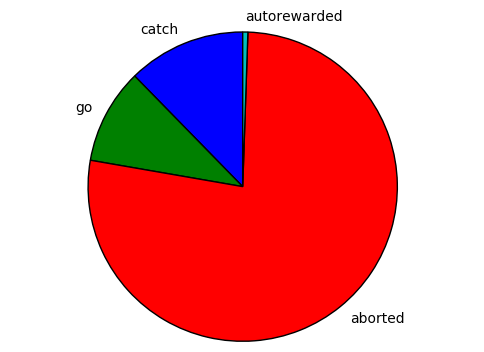

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
lbls,sizes = zip(*pie_data.iteritems())

fig, ax = plt.subplots()
ax.pie(sizes,labels=lbls,#autopct='%1.1f%%',
        startangle=90)
ax.axis('equal')

In [7]:
m = {'go':1,
     'catch':0,
     True:0,
     False:1,
    }

confusion_matrix = [
    [0,0],
    [0,0],
]

for tr in trials:
    trial_type = get_trial_type(tr)
    
    if trial_type in ('go','catch'):
        lick = licked_in_response_window(tr)
        confusion_matrix[m[trial_type]][m[lick]] += 1


In [8]:
confusion_matrix

[[63, 52], [76, 17]]

(0.0, 2.0, 0.0, 2.0)

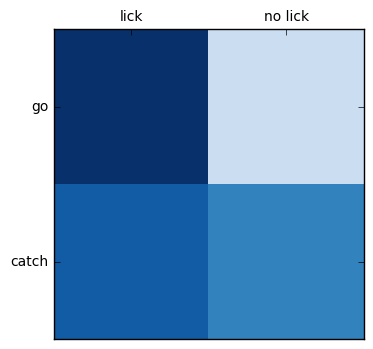

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
ax.pcolor(confusion_matrix, cmap=plt.cm.Blues,vmin=0)
ax.set_xticks((0.5,1.5))
ax.set_xticklabels(('lick','no lick'))
ax.set_yticks((0.5,1.5))
ax.set_yticklabels(('catch','go'))
ax.xaxis.tick_top()
ax.axis('equal')

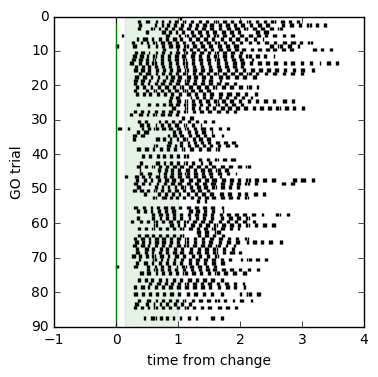

In [10]:
fig, ax = plt.subplots(figsize=(4,4))


ax.axvline(0.0,color='g')
ax.axvspan(0.15,1.0,color='g',alpha=0.1)
ax.set_xlim(-1,4)
ax.set_ylabel('GO trial')
ax.set_xlabel('time from change')

ii = 0
for tr in trials:
    if get_trial_type(tr)=='go':
        licks = get_aligned_licks(tr)
        ax.vlines(licks,ii,ii-1,color='k')
        ii -= 1
        
ax.set_yticklabels(-ax.get_yticks().astype(int))

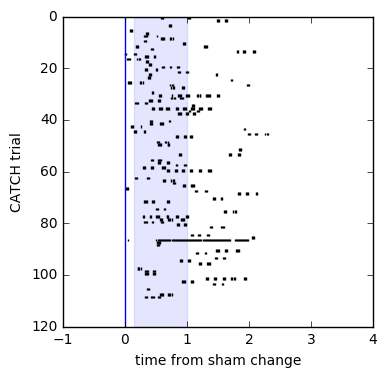

In [11]:
fig, ax = plt.subplots(figsize=(4,4))


ax.axvline(0.0,color='b')
ax.axvspan(0.15,1.0,color='b',alpha=0.1)
ax.set_xlim(-1,4)
ax.set_ylabel('CATCH trial')
ax.set_xlabel('time from sham change')

ii = 0
for tr in trials:
    if get_trial_type(tr)=='catch':
        licks = get_aligned_licks(tr)
        ax.vlines(licks,ii,ii-1,color='k')
        ii -= 1
        
ax.set_yticklabels(-ax.get_yticks().astype(int))